In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. Divide the dataset into a training set of size 100, and test set of size 100

In [63]:
polynomial = pd.read_csv('A1_datasets/polynomial200.csv', header=None)
k_values = [1, 3, 5, 7, 9, 11]

# shuffling the dataset
n_rows = polynomial.shape[0]
index = np.random.permutation(n_rows)
shuffled_polynomial = polynomial.to_numpy()[index]


# splitting the dataset into two pieces for training and testing
train_data = shuffled_polynomial[:(len(polynomial) // 2), :]
test_data = shuffled_polynomial[(len(polynomial)) // 2:, :]

x_train = x = train_data[:, 0]
y_train = y = train_data[:, 1]


x_test = test_data[:, 0]
y_test = test_data[:, 1]

2. Plot the training and test set side-by-side in a 1 × 2 pattern.

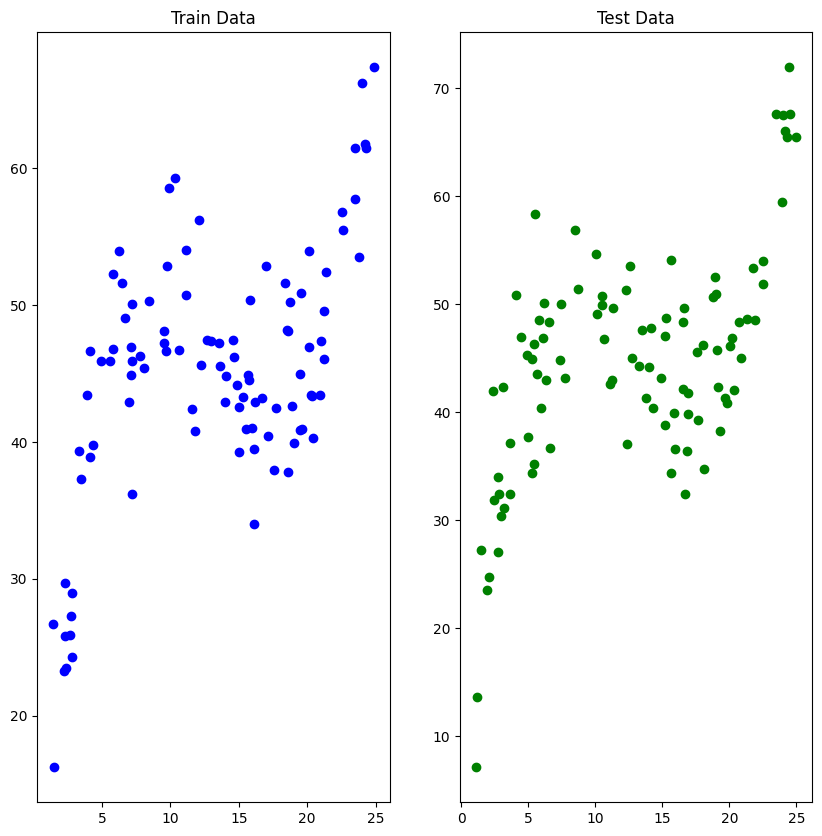

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax1.scatter(train_data[:, 0], train_data[:, 1], c='blue')
ax1.set_title('Train Data')

ax2.scatter(test_data[:, 0], test_data[:, 1], c='green')
ax2.set_title('Test Data')


plt.show()

3. Display a 2 × 3 plot showing the k-NN regression result and the MSE training error for
k = 1, 3, 5, 7, 9, 11. For example, the plot for k = 5 might look something like this
4. Compute and present the MSE test error for k = 1, 3, 5, 7, 9, 11.

In [43]:
# returns the avg y value for the array(arr) with x and y values
def knn_predict_y(arr):
    all_y = arr[:, 1]
    result = all_y.sum() / all_y.size
    return result

# returns the predicted regression coordinate for each point in test data
def calculate_regression(k_value):
    regression_points = np.empty(shape=(0, 2))
    for coordinates in test_data:
        current_x = coordinates[0]
        predicted_point = predict(current_x, k_value)
        regression_points = np.append(regression_points, [predicted_point], axis=0)
    return regression_points

# returns a predicted x and y value for a point based on the training dataset
def predict(current_x, k_value):
    distance = np.abs(x - current_x)
    sorted_indices = np.argsort(distance)
    points = np.empty(shape=(0, 2))
    for k_value in range(k_value):
        closest_point_index = sorted_indices[k_value]
        point = (x[closest_point_index], y[closest_point_index])
        points = np.append(points, [[point[0], point[1]]], axis=0)
    predicted_y = knn_predict_y(points)
    predicted_point = np.array([current_x, predicted_y])
    return predicted_point

In [44]:
# sorting the data by their index
index_train_sorted = np.argsort(x_train)
x_train_sorted = x_train[index_train_sorted]
y_train_sorted = y_train[index_train_sorted]

index_test_sorted = np.argsort(x_test)
x_test_sorted = x_test[index_test_sorted]
y_test_sorted = y_test[index_test_sorted]

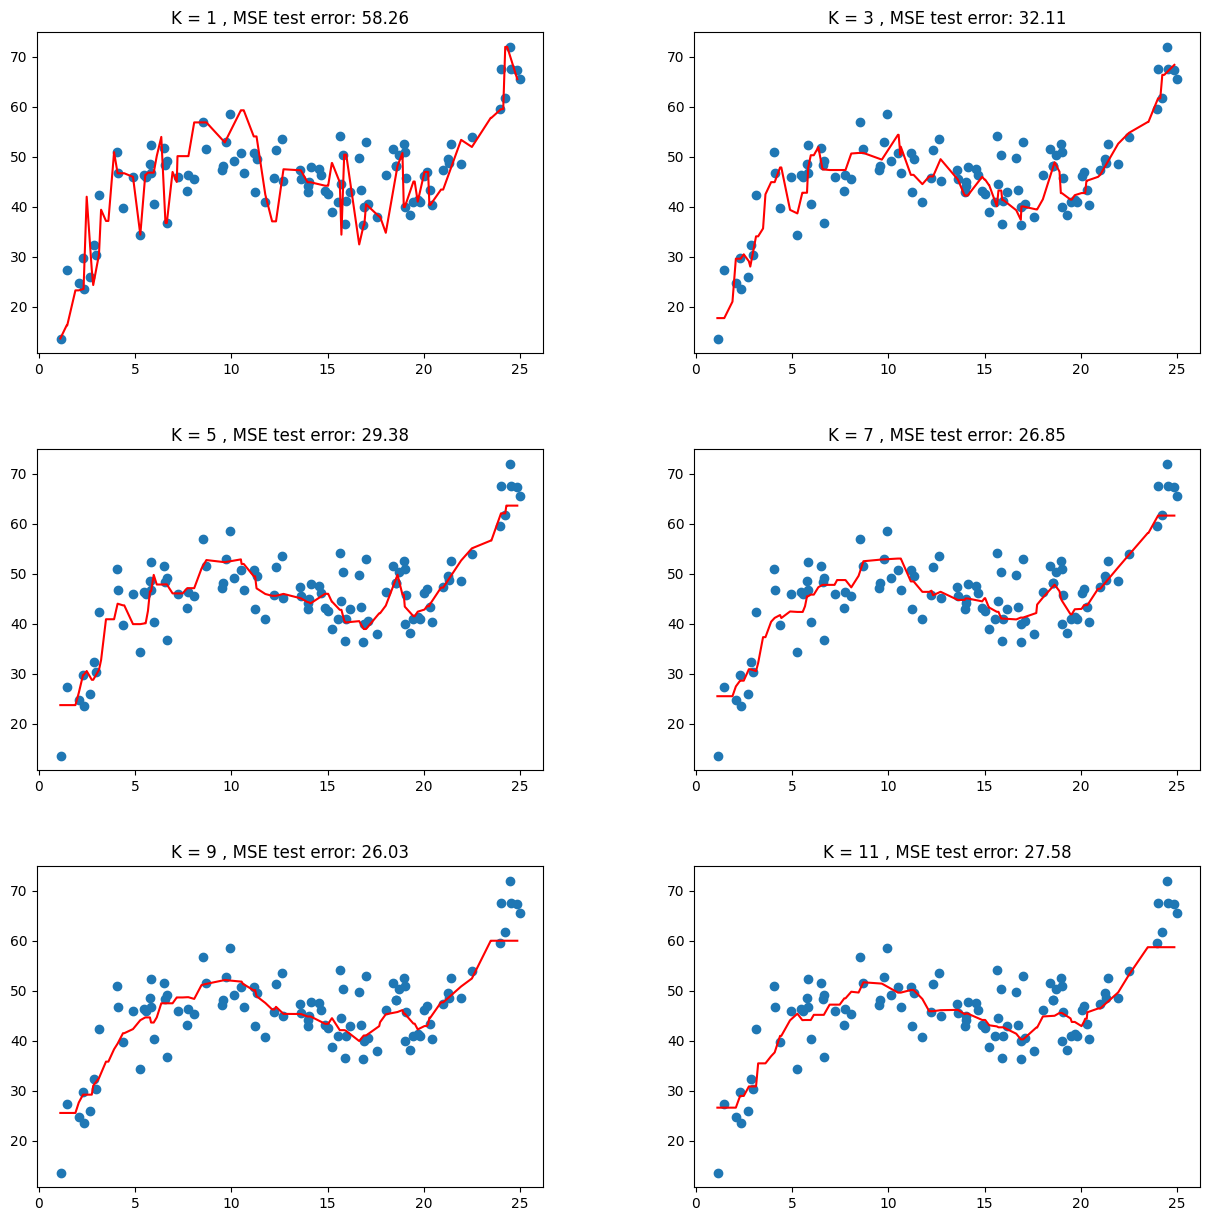

In [64]:
# plotting a new plot for each k value
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for i, k in enumerate(k_values):
    ax = axes[i]
    r = calculate_regression(k)
    mse = np.mean(np.square(y_test - r[:, 1]))
    rounded_mse = np.round(mse, decimals=2)
    sorted_regression_data = r[r[:, 0].argsort()]
    x_regression = np.array(sorted_regression_data[:, 0])
    y_regression = np.array(sorted_regression_data[:, 1])
    ax.plot(x_train_sorted, y_train_sorted, 'o')
    ax.plot(x_regression, y_regression, 'r-')
    ax.set_title("K = " + str(k) + " , MSE test error: " + str(rounded_mse))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()